In [21]:
import os
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold


In [4]:
files = os.listdir('../final_stats/preprocessed_3/')
no_sent_files = files[:7]

In [5]:
no_sent_files

['preprocessed_no_sent_last_1.csv',
 'preprocessed_no_sent_last_3.csv',
 'preprocessed_no_sent_last_3_wt.csv',
 'preprocessed_no_sent_last_7.csv',
 'preprocessed_no_sent_last_7_wt.csv',
 'preprocessed_no_sent_last_ssn.csv',
 'preprocessed_no_sent_last_ssn_wt.csv']

### File Retrieval and Preprocessing

In [32]:
def split_target(df, target_col='away_winner_wts'):
    df = df.copy()
    target = df.pop(target_col)
    return df, target

def normalize_df(df):
    scaler = StandardScaler()
    data, target = split_target(df)
    data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return data, target

def get_data(file):
    df = pd.read_csv(f'../final_stats/preprocessed_3/{file}', index_col=[0])
    data, target = normalize_df(df)
    return data, target

def shuffle_data(x,y, seed):
    x_shuffle = x.sample(frac=1, random_state=seed)
    y_shuffle = y.sample(frac=1, random_state=seed)
    return x_shuffle, y_shuffle


In [10]:
x, y = get_data(files[1])
x.head()

,home_score_team,home_score_opp,home_pass_cmp_off,home_pass_att_off,home_pass_yds_off,home_pass_tds_off,home_sacks_off,home_sacks_yds_off,home_pass_qb_rate,home_rush_att_off,...,away_ravens,away_saints,away_seahawks,away_steelers,away_texans,away_titans,away_vikings,day_Sat,day_Sun,day_Thu
0,-0.330684,-1.022436,-1.185954,-0.990053,-0.197476,0.349873,0.015198,0.208516,0.087025,-0.033972,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
1,0.244527,0.938400,0.200903,0.001574,0.729646,0.349873,-0.303967,-0.043624,1.006098,0.639060,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
2,1.970161,0.557127,0.857836,0.001574,1.969984,2.209956,-1.261462,-1.136230,3.156507,-0.168578,...,-0.199007,-0.199007,-0.171499,-0.199007,5.024938,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
3,0.244527,-0.804566,-1.258947,-0.824782,-0.986782,-1.045190,-0.303967,0.418632,-1.113307,2.321639,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
4,-0.958188,0.230321,-1.185954,-1.100234,-1.368906,-1.045190,-0.623132,-0.505880,-1.472078,-0.168578,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607


In [33]:
xs, ys = shuffle_data(x,y,12)

In [34]:
xs

,home_score_team,home_score_opp,home_pass_cmp_off,home_pass_att_off,home_pass_yds_off,home_pass_tds_off,home_sacks_off,home_sacks_yds_off,home_pass_qb_rate,home_rush_att_off,...,away_ravens,away_saints,away_seahawks,away_steelers,away_texans,away_titans,away_vikings,day_Sat,day_Sun,day_Thu
7,-0.487560,1.101804,1.222798,0.938111,-0.285176,-0.580169,0.972694,1.553261,-0.211951,-0.908913,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
36,0.505987,0.992868,1.003821,0.552478,1.544009,1.279914,0.972694,1.048981,1.433522,-1.716552,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
46,-0.749020,1.101804,-1.185954,-1.540957,-0.661036,-1.045190,-0.303967,-0.295764,-0.818761,0.706363,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
17,-0.278392,0.502659,-0.237052,-0.163697,0.360050,-0.115148,0.334363,0.418632,0.944088,0.639060,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
21,0.296819,-2.166258,0.054918,-0.273878,0.165856,0.349873,-1.580627,-1.472416,1.209844,0.908273,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.244527,-0.804566,-1.258947,-0.824782,-0.986782,-1.045190,-0.303967,0.418632,-1.113307,2.321639,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
2,1.970161,0.557127,0.857836,0.001574,1.969984,2.209956,-1.261462,-1.136230,3.156507,-0.168578,...,-0.199007,-0.199007,-0.171499,-0.199007,5.024938,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
6,0.349111,-0.586695,0.565866,0.111755,0.278614,0.814894,0.334363,0.796842,1.178839,-0.774307,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,0.603023,-0.223607
27,-0.749020,0.774997,-1.477924,-1.155324,-1.469136,-0.580169,1.291859,1.805401,-1.782126,0.437150,...,-0.199007,-0.199007,-0.171499,-0.199007,-0.199007,-0.139347,-0.171499,-0.454859,-1.658312,4.472136


In [35]:
ys

7     0
36    1
46    0
17    0
21    0
     ..
3     0
2     0
6     1
27    0
75    1
Name: away_winner_wts, Length: 105, dtype: int64

In [30]:
y.sample(frac=1, random_state=1)

65    1
35    0
42    0
93    0
38    0
     ..
75    1
9     0
72    1
12    1
37    0
Name: away_winner_wts, Length: 105, dtype: int64

### Chart Code

In [11]:
def get_average_acc_history(acc_histories):
    num_epochs = len(acc_histories[0])
    return [np.mean([x[i] for x in acc_histories]) for i in range(num_epochs)]

def get_average_loss_history(loss_histories):
    num_epochs = len(loss_histories[0])
    return [np.mean([x[i] for x in loss_histories]) for i in range(num_epochs)]
        
def plot_ave_acc_and_loss_histories(acc_histories, loss_histories):
    average_acc_history = get_average_acc_history(acc_histories)
    average_loss_history = get_average_loss_history(loss_histories)

    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")

    plt.subplot(1, 2, 2)

    plt.plot(range(1, len(average_loss_history) + 1), average_loss_history)
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
    plt.show()

def compare_ave_loss_acc_histories(acc_hist_1, acc_hist_2, loss_hist_1, loss_hist_2):
    min_epochs = min(len(acc_hist_1[0]), len(acc_hist_2[0]))
    
    ave_acc_hist_1 = get_average_acc_history(acc_hist_1)
    ave_loss_hist_1 = get_average_loss_history(loss_hist_1)
    
    ave_acc_hist_2 = get_average_acc_history(acc_hist_2)
    ave_loss_hist_2 = get_average_loss_history(loss_hist_2)


    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    epochs = range(1, min_epochs + 1)
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, ave_acc_hist_1, solid_blue_line, label='Model 1')
    plt.plot(epochs, ave_acc_hist_2, solid_red_line, label='Model 2')
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)

    plt.plot(epochs, ave_loss_hist_1, solid_blue_line, label='Model 1')
    plt.plot(epochs, ave_loss_hist_2, solid_red_line, label='Model 2')
    plt.xlabel("Epochs")
    plt.ylabel("Validation Loss")
    plt.legend()
    
    plt.show()
    

### Base model

In [14]:
def build_model():
    model = tf.keras.Sequential([ 
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [15]:
def build_model_2():
    model = tf.keras.Sequential([ 
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    return model

### K-Fold Cross Validation


#### Option 1 - Base sklearn Pandas example

In [ ]:


def split_target(df, target_col='away_winner_wts'):
    df = df.copy()
    target = df.pop(target_col)
    return df, target

def normalize_df(df):
    scaler = StandardScaler()
    data, target = split_target(df)
    data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return data, target

def get_data(file):
    df = pd.read_csv(f'../final_stats/preprocessed_3/{file}', index_col=[0])
    data, target = normalize_df(df)
    return data, target

def remove_last_1(df):
    df = df.copy()
    df.drop(df.iloc[:, 1:52], inplace=True, axis=1)
    df.drop(df.iloc[:, 53:103], inplace=True, axis=1)
    return df

def get_data_skip_last_1(file):
    df = pd.read_csv(f'../final_stats/preprocessed/{file}', index_col=[0])
    # df = remove_last_1(df)
    data, target = normalize_df(df)
    return data, target


In [44]:
def run_k_fold(x, y, k, build):
    kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=99)

    all_scores = []
    for train_i, test_i in kf.split(x):
        x_train, x_test = x.iloc[train_i, :], x.iloc[test_i, :]
        y_train, y_test = y[train_i], y[test_i]
        model = build()
        model.fit(x_train, y_train, epochs = 50, verbose=0)
        val_loss, val_accuracy = model.evaluate(x_test, y_test, verbose=0)
        all_scores.append(val_accuracy)
    print(all_scores)
    print(f"Average Accuracy for {k} Folds: ", np.average(all_scores))


run_k_fold(x, y, 5, build_model_2)

KeyError: '[96] not in index'

#### Option 2 - DLWP Example
Use average validation loss and average validation accuracy accross each fold and plot that to determine where overfitting occurs

In [25]:
def get_max_ave_acc_min_ave_loss(acc_histories, loss_histories):
    num_epochs = len(acc_histories[0])
    average_acc_history = [
        np.mean([x[i] for x in acc_histories]) for i in range(num_epochs)
    ]
    index_acc = np.argmax(average_acc_history)
    max_acc = round(average_acc_history[index_acc]*100,2)
    print(f'\nMax Average Accuracy: {max_acc}% \t Num Epochs: {index_acc + 1} ')

    average_loss_history = [
        np.mean([x[i] for x in loss_histories]) for i in range(num_epochs)
    ]
    index_loss = np.argmin(average_loss_history)
    min_loss = round(average_loss_history[index_loss], 2)
    print(f'Min Average Loss: {min_loss} \t Num Epochs: {index_loss + 1} ')
    return

### Fresh look at this

In [56]:
def run_k_fold2(x, y, k, n_repeats, num_epochs, build_m):
    num_val_samples = len(x) // k
    all_scores = [] 
    
    all_histories = []
    acc_histories = []
    loss_histories = []

    # cv = RepeatedKFold(10, 10, 99)
    for n in range(n_repeats):
        xs, ys = shuffle_data(x,y,n)
        for i in range(k):
            print(f"Processing fold #{i+1}")
            val_data = xs[i * num_val_samples: (i + 1) * num_val_samples]
            val_targets = ys[i * num_val_samples: (i + 1) * num_val_samples]

            partial_x = np.concatenate(
                    [xs[:i * num_val_samples],
                    xs[(i + 1) * num_val_samples:]],
                    axis=0
                )
            
            partial_y = np.concatenate(
                    [ys[:i * num_val_samples],
                    ys[(i + 1) * num_val_samples:]],
                    axis=0
                )
            
            model = build_m()

            history = model.fit(
                    partial_x, partial_y, 
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=16, verbose=0
                )
            
            all_histories.append(history.history)
            acc_histories.append(history.history['val_accuracy'])
            loss_histories.append(history.history['val_loss'])

    get_max_ave_acc_min_ave_loss(acc_histories, loss_histories)
    plot_ave_acc_and_loss_histories(acc_histories, loss_histories)
    return all_histories, acc_histories, loss_histories

Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4
Processing fold #5
Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4
Processing fold #5

Max Average Accuracy: 49.05% 	 Num Epochs: 2 
Min Average Loss: 0.78 	 Num Epochs: 2 


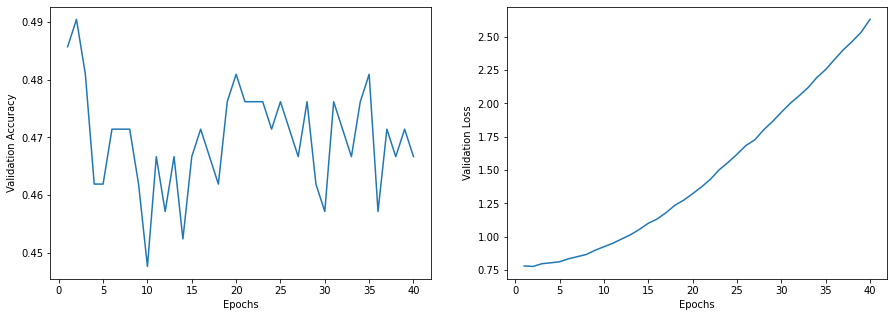

In [57]:
all_histories1, acc_histories1, loss_histories1 = run_k_fold2(x , y, 5, 2, 40, build_model)


In [55]:
len(all_histories1)

10

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3

Max Average Accuracy: 63.46% 	 Num Epochs: 39 
Min Average Loss: 0.7 	 Num Epochs: 3 


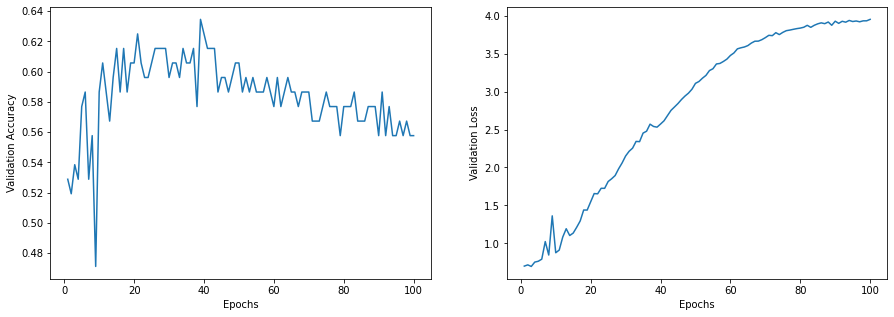

In [98]:
all_histories2, acc_histories2, loss_histories2 = run_k_fold2(x , y, 4, 100, build_model_2)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4

Max Average Accuracy: 61.9% 	 Num Epochs: 43 
Min Average Loss: 0.76 	 Num Epochs: 1 


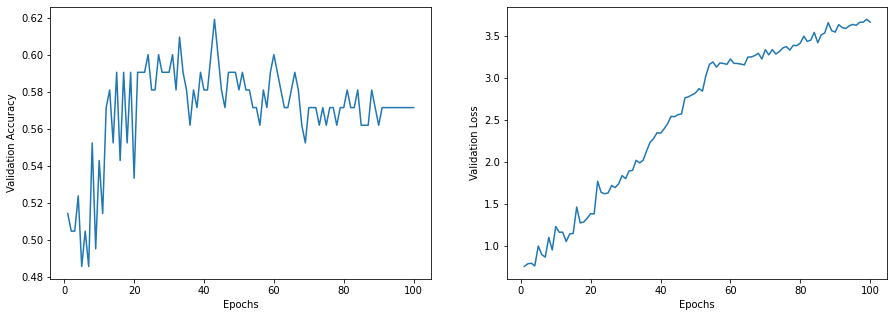

In [99]:
all_histories2a, acc_histories2a, loss_histories2a = run_k_fold2(x , y, 5, 100, build_model_2)



Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4
Processing fold #5
Processing fold #6
Processing fold #7
Processing fold #8
Processing fold #9

Max Average Accuracy: 59.0% 	 Num Epochs: 9 
Min Average Loss: 0.71 	 Num Epochs: 3 


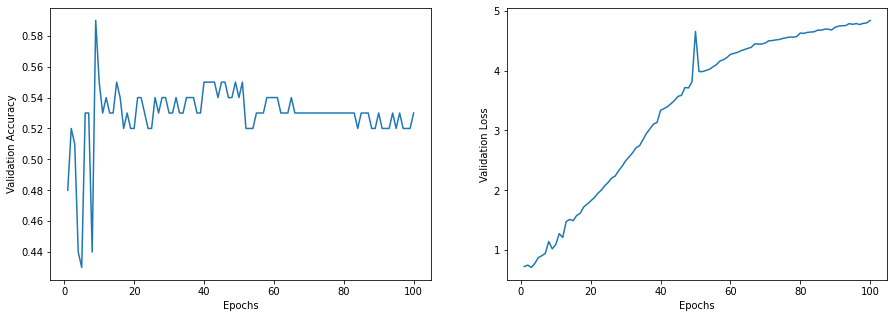

In [104]:
all_histories2b, acc_histories2b, loss_histories2b = run_k_fold2(x , y, 10, 100, build_model_2)

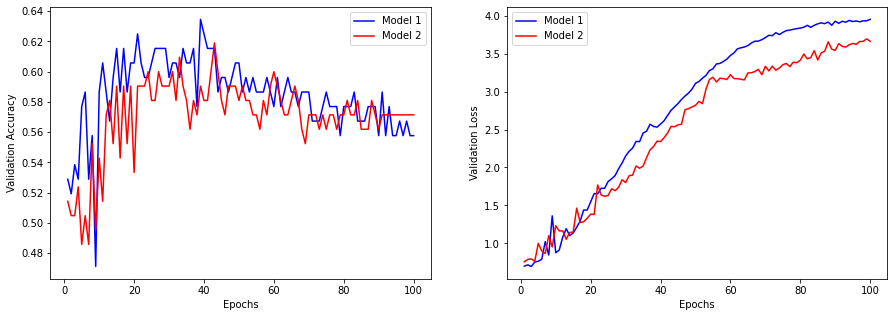

In [102]:
compare_ave_loss_acc_histories(acc_histories2, acc_histories2a, loss_histories2, loss_histories2a)

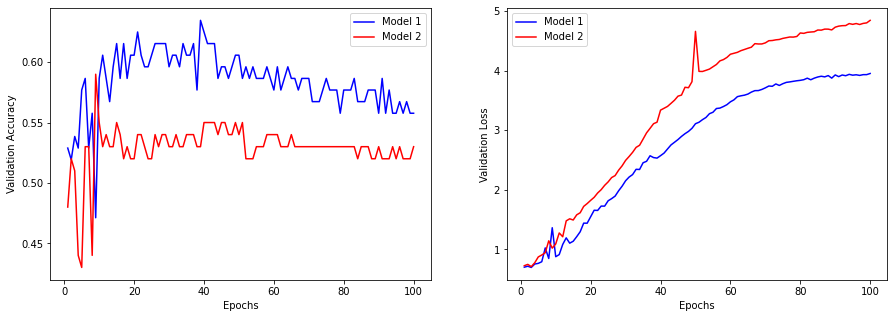

In [105]:
compare_ave_loss_acc_histories(acc_histories2, acc_histories2b, loss_histories2, loss_histories2b)

### Run for every dataset on base model??


In [103]:
# for file in files
files

['preprocessed_no_sent_last_1.csv',
 'preprocessed_no_sent_last_10.csv',
 'preprocessed_no_sent_last_3.csv',
 'preprocessed_no_sent_last_5.csv',
 'preprocessed_no_sent_last_7.csv',
 'preprocessed_sent_24_last_1.csv',
 'preprocessed_sent_24_last_10.csv',
 'preprocessed_sent_24_last_3.csv',
 'preprocessed_sent_24_last_5.csv',
 'preprocessed_sent_24_last_7.csv',
 'preprocessed_sent_96_last_1.csv',
 'preprocessed_sent_96_last_10.csv',
 'preprocessed_sent_96_last_3.csv',
 'preprocessed_sent_96_last_5.csv',
 'preprocessed_sent_96_last_7.csv',
 'preprocessed_sent_cross_last_1.csv',
 'preprocessed_sent_cross_last_10.csv',
 'preprocessed_sent_cross_last_3.csv',
 'preprocessed_sent_cross_last_5.csv',
 'preprocessed_sent_cross_last_7.csv']

### Old Chart Code Functions

In [63]:
def plot_train_val_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
def plot_train_val_acc(history):
    plt.clf()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
        
    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
        
    plt.plot(epochs, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation Accuracy')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

def plot_train_val_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)
    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    # plt.plot(epochs_range, acc, label='Training Accuracy')
    # plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    
 
    plt.plot(epochs_range, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs_range, val_acc, solid_blue_line, label = 'Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, blue_dots, label='Training Loss')
    plt.plot(epochs_range, val_loss, solid_blue_line, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
  
def compare_loss_and_acc(hist1, hist2, title1, title2): 
    min_epochs = min(len(hist1.history['loss']), len(hist2.history['loss']))
    
    train_loss_1 = hist1['loss'][:min_epochs]
    val_loss_1 = hist1['val_loss'][:min_epochs]

    train_loss_2 = hist2['loss'][:min_epochs]
    val_loss_2 = hist2['val_loss'][:min_epochs]


    train_acc_1 = hist1['accuracy'][:min_epochs]
    val_acc_1 = hist1['val_accuracy'][:min_epochs]

    train_acc_2 = hist2['accuracy'][:min_epochs]
    val_acc_2 = hist2['val_accuracy'][:min_epochs]

    epochs = range(1, min_epochs + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)

    plt.plot(epochs, train_loss_1, blue_dots, label = f'{title1} Training Loss')
    plt.plot(epochs, val_loss_1, solid_blue_line, label = f'{title1} Validation Loss')
    plt.plot(epochs, train_loss_2, red_dots, label = f'{title2} Training Loss')
    plt.plot(epochs, val_loss_2, solid_red_line, label = f'{title2} Validation Loss')
    # plt.title('Loss With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc_1, blue_dots, label = f'{title1} Training Accuracy')
    plt.plot(epochs, val_acc_1, solid_blue_line, label = f'{title1} Validation Accuracy')
    plt.plot(epochs, train_acc_2, red_dots, label = f'{title2} Training Accuracy')
    plt.plot(epochs, val_acc_2, solid_red_line, label = f'{title2} Validation Accuracy')
    # plt.title('Accuracy With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.show()

def compare_acc(hist1, hist2, title1, title2): 
    min_epochs = min(len(hist1.history['accuracy']), len(hist2.history['accuracy']))
    acc = hist1.history['accuracy'][:min_epochs]
    val_acc = hist1.history['val_accuracy'][:min_epochs]
    acc_drop = hist2.history['accuracy'][:min_epochs]
    val_acc_drop = hist2.history['val_accuracy'][:min_epochs]
    
    epochs = range(1, min_epochs + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    plt.plot(epochs, acc, blue_dots, label = f'{title1} Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = f'{title1} Validation Accuracy')
    plt.plot(epochs, acc_drop, red_dots, label = f'{title2} Training Accuracy')
    plt.plot(epochs, val_acc_drop, solid_red_line, label = f'{title2} Validation Accuracy')
    # plt.title('Accuracy With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()